In [3]:
import mne
%pip install mne_bids
%pip install --upgrade mne_bids

from mne_bids import BIDSPath, print_dir_tree, write_raw_bids, make_dataset_description, update_sidecar_json

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Allows us to work with file paths
import os.path as op
#Makes file path handling simpler
from pathlib import Path

In [5]:
#Change the file path to your data's location
data_dir = Path(r"C:\N8_internship_code\second_tester_data\source_data")
print_dir_tree(data_dir, max_depth=1)

|source_data\
|--- rest\
|--- video\


In [6]:
children = [child for child in data_dir.iterdir()]
children

[WindowsPath('C:/N8_internship_code/second_tester_data/source_data/rest'),
 WindowsPath('C:/N8_internship_code/second_tester_data/source_data/video')]

In [7]:
#Change this to match the file number
dir_number = 0
files = [file for file in children[dir_number].iterdir()]

In [8]:
file_path = files[0]
file_path

WindowsPath('C:/N8_internship_code/second_tester_data/source_data/rest/CLV002.set')

In [9]:
data = mne.io.read_raw_eeglab(file_path)

C:\Users\Ariana Williams\AppData\Local\Temp\ipykernel_19764\4240071171.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  data = mne.io.read_raw_eeglab(file_path)
C:\Users\Ariana Williams\AppData\Local\Temp\ipykernel_19764\4240071171.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(file_path)
C:\Users\Ariana Williams\AppData\Local\Temp\ipykernel_19764\4240071171.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(file_path)


In [10]:
data

<RawEEGLAB | CLV002.set, 65 x 481064 (481.1 s), ~238.6 MiB, data loaded>

In [11]:
from datetime import datetime, timezone
from dateutil.relativedelta import relativedelta
from mne.transforms import Transform

data.info["device_info"] = {
    "type": "Emotiv Epoc X",
    "model": "12-channel EEG",
    "serial": 33456423,
    "site": "yes"
    }



# Generates the (approx) birthdate of the participant based on the measurement date and age
data.set_meas_date(datetime(2015, 6, 7, tzinfo= timezone.utc))
recording_date = data.info["meas_date"]
Birthdate = recording_date - relativedelta(years=30)


data.info["subject_info"] = {
    "id": 1,
    "his_id": "sub-001",
    "last_name": "Doe",
    "first_name": "John",
    "middle_name": "A",
    "birthday": Birthdate,
    "sex": 2,
    "hand": 1,
    "weight": 70.0,
    "height": 175.0,
}

data.info["line_freq"] = 50

data.info["bads"] = ["C3", "F3" ]

data.info["description"] = "a resting state dataset"

data.info["dev_head_t"] = Transform("meg", "head")

data.info["experimenter"] = "John Doe"

data.info["helium_info"] = {
    "he_level_raw": 20,
    "helium_level": 12,
    "orig_file_guid": "1234567890abcdef",
    "meas_date": (datetime(2015, 6, 7, tzinfo= timezone.utc))
    }


In [12]:
data

<RawEEGLAB | CLV002.set, 65 x 481064 (481.1 s), ~238.6 MiB, data loaded>

In [13]:
bids_root = op.join(data_dir.parent, "bids_example")
bids_root

'C:\\N8_internship_code\\second_tester_data\\bids_example'

In [14]:
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

In [15]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: {montage_description}")

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 64 channels>


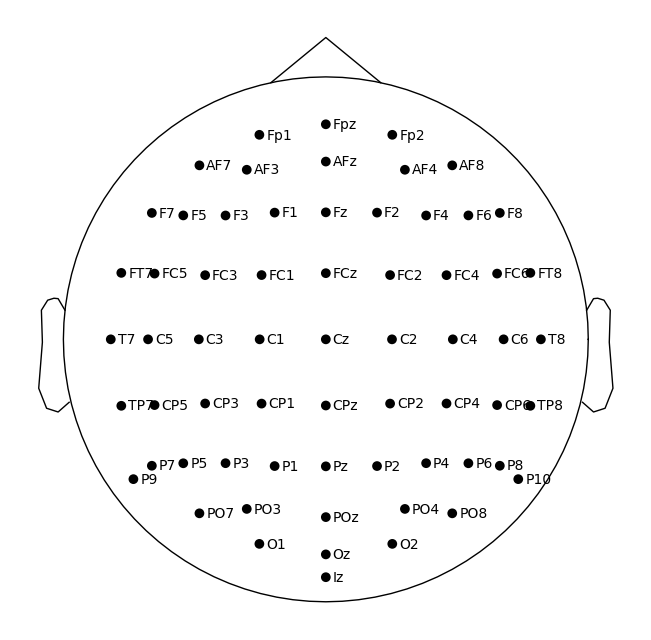

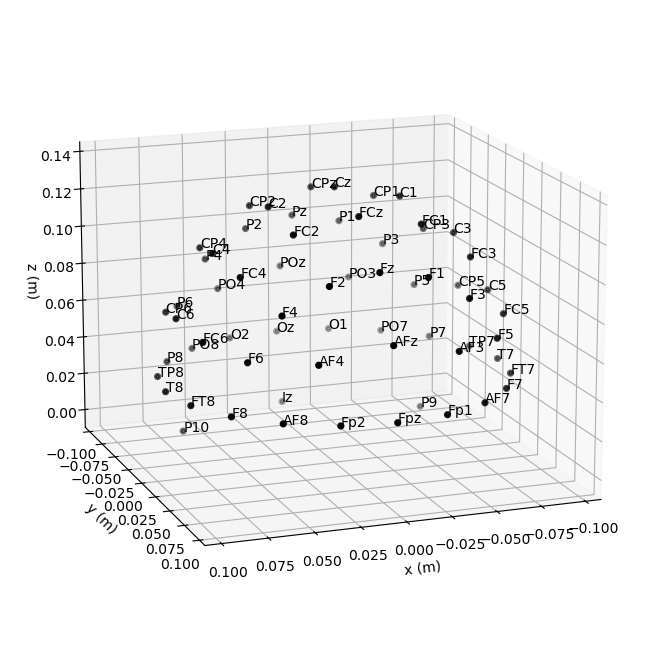

In [16]:
import mne

my_montage = mne.channels.make_standard_montage("biosemi64")

# Printing montage information
print(my_montage)

# Viualising montage in 2D
my_montage.plot()

# Visualising montage in 3D
fig = my_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle

In [17]:
data.set_montage(my_montage, match_case=True, match_alias=False, on_missing='ignore', verbose=None)

<RawEEGLAB | CLV002.set, 65 x 481064 (481.1 s), ~238.6 MiB, data loaded>

In [18]:
#Edit this information ot match your data
subject_id = "001"
task = "rest"

bids_path = BIDSPath(subject=subject_id, task=task, root=bids_root)
write_raw_bids(data, bids_path, overwrite=True, allow_preload=True, format="EEGLAB")

Writing 'C:\N8_internship_code\second_tester_data\bids_example\participants.tsv'...
Writing 'C:\N8_internship_code\second_tester_data\bids_example\participants.json'...
Writing 'C:/N8_internship_code/second_tester_data/bids_example/sub-001/eeg/sub-001_space-CapTrak_electrodes.tsv'...
Writing 'C:/N8_internship_code/second_tester_data/bids_example/sub-001/eeg/sub-001_space-CapTrak_coordsystem.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['S 20', 'S 21', 'boundary']
Writing 'C:\N8_internship_code\second_tester_data\bids_example\sub-001\eeg\sub-001_task-rest_events.tsv'...
Writing 'C:\N8_internship_code\second_tester_data\bids_example\sub-001\eeg\sub-001_task-rest_events.json'...
Writing 'C:\N8_internship_code\second_tester_data\bids_example\dataset_description.json'...
W

C:\Users\Ariana Williams\AppData\Local\Temp\ipykernel_19764\1908755717.py:6: RuntimeWarning: Converting data files to EEGLAB format
  write_raw_bids(data, bids_path, overwrite=True, allow_preload=True, format="EEGLAB")


Writing 'C:\N8_internship_code\second_tester_data\bids_example\sub-001\sub-001_scans.tsv'...
Wrote C:\N8_internship_code\second_tester_data\bids_example\sub-001\sub-001_scans.tsv entry with eeg\sub-001_task-rest_eeg.set.


BIDSPath(
root: C:/N8_internship_code/second_tester_data/bids_example
datatype: eeg
basename: sub-001_task-rest_eeg.set)

In [19]:
#Edit this information ot match your data
subject_id = "001"
task = "rest"

bids_path = BIDSPath(subject=subject_id, task=task, root=bids_root)
write_raw_bids(data, bids_path, overwrite=True, allow_preload=True, format="EEGLAB")

Writing 'C:\N8_internship_code\second_tester_data\bids_example\participants.tsv'...
Writing 'C:\N8_internship_code\second_tester_data\bids_example\participants.json'...
Writing 'C:/N8_internship_code/second_tester_data/bids_example/sub-001/eeg/sub-001_space-CapTrak_electrodes.tsv'...
Writing 'C:/N8_internship_code/second_tester_data/bids_example/sub-001/eeg/sub-001_space-CapTrak_coordsystem.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['S 20', 'S 21', 'boundary']
Writing 'C:\N8_internship_code\second_tester_data\bids_example\sub-001\eeg\sub-001_task-rest_events.tsv'...
Writing 'C:\N8_internship_code\second_tester_data\bids_example\sub-001\eeg\sub-001_task-rest_events.json'...
Writing 'C:\N8_internship_code\second_tester_data\bids_example\dataset_description.json'...
W

C:\Users\Ariana Williams\AppData\Local\Temp\ipykernel_19764\1908755717.py:6: RuntimeWarning: Converting data files to EEGLAB format
  write_raw_bids(data, bids_path, overwrite=True, allow_preload=True, format="EEGLAB")


Writing 'C:\N8_internship_code\second_tester_data\bids_example\sub-001\sub-001_scans.tsv'...
Wrote C:\N8_internship_code\second_tester_data\bids_example\sub-001\sub-001_scans.tsv entry with eeg\sub-001_task-rest_eeg.set.


BIDSPath(
root: C:/N8_internship_code/second_tester_data/bids_example
datatype: eeg
basename: sub-001_task-rest_eeg.set)

In [20]:
#creating a dataset description JSON file (separate to other data entry types) [for people who want a better description of their dataset than previously provided] 
# #{will overwrite any existing dataset_description.json file in the root of the BIDS directory}
make_dataset_description(
    path=bids_root,
    name="EEGManyLabs Resting State Study", 
    hed_version="1",
    dataset_type='raw',
    data_license="CCO",
    authors=["Ariana Williams", "Daniel Brady"],
    acknowledgements=None,
    how_to_acknowledge="Cite (Williams et al., 2025) when using this dataset",
    funding=["The NHS", "The Uk government"],
    ethics_approvals="Ethical approval was granted by the University of Leeds School of Psychology Ethics committee (12345 2025)",
    references_and_links="https://mne.tools/mne-bids/stable/whats_new_previous_releases.html",
    doi="doi:https://doi.org/10.1016/j.tins.2017.02.004",
    generated_by=[
        {
            "Name": "MNE-BIDS",
            "Version": "0.14",
            "Description": "Used to convert MEG data into BIDS format."
        },
        {
            "Name": "MNE-Python",
            "Version": "1.6.1",
            "Description": "Used for MEG preprocessing and analysis."
        }
    ],
    source_datasets=[
        {
            "URL": "https://example.com/source_dataset",
            "DOI": "10.1234/example.doi",
        }],
            overwrite=True,
            verbose=True)

Writing 'C:\N8_internship_code\second_tester_data\bids_example\dataset_description.json'...
